In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [3]:
data1 = pd.read_csv('2009-10.csv', encoding='latin1')
data2 = pd.read_csv('20010-11.csv', encoding='latin1')

In [4]:
data = pd.concat([data1, data2])
data.reset_index(drop=True, inplace=True)

In [5]:
data.shape

(1067371, 8)

In [6]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day_of_Week'] = data['InvoiceDate'].dt.weekday

In [8]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day_of_Week
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,4
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,4
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,4
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,12,4


In [9]:
country_dummies = pd.get_dummies(data['Country'], prefix='Country')
data = pd.concat([data, country_dummies], axis=1)
data.drop('Country', axis=1, inplace=True)

In [10]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day_of_Week,...,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Country_West Indies
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,2009,12,1,...,False,False,False,False,False,False,False,True,False,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,2009,12,1,...,False,False,False,False,False,False,False,True,False,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,2009,12,1,...,False,False,False,False,False,False,False,True,False,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,2009,12,1,...,False,False,False,False,False,False,False,True,False,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,2009,12,1,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,2011,12,4,...,False,False,False,False,False,False,False,False,False,False
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,2011,12,4,...,False,False,False,False,False,False,False,False,False,False
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,2011,12,4,...,False,False,False,False,False,False,False,False,False,False
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,2011,12,4,...,False,False,False,False,False,False,False,False,False,False


In [11]:
data['Sales'] = data['Quantity'] * data['Price']


In [13]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day_of_Week,...,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Country_West Indies,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,2009,12,1,...,False,False,False,False,False,False,True,False,False,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,2009,12,1,...,False,False,False,False,False,False,True,False,False,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,2009,12,1,...,False,False,False,False,False,False,True,False,False,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,2009,12,1,...,False,False,False,False,False,False,True,False,False,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,2009,12,1,...,False,False,False,False,False,False,True,False,False,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,2011,12,4,...,False,False,False,False,False,False,False,False,False,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,2011,12,4,...,False,False,False,False,False,False,False,False,False,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,2011,12,4,...,False,False,False,False,False,False,False,False,False,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,2011,12,4,...,False,False,False,False,False,False,False,False,False,14.85


In [14]:
target_variable = 'Sales'

features = ['Year', 'Month', 'Day_of_Week', 'Quantity', 'Price']

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target_variable], test_size=0.2, random_state=42)

In [17]:
print(X_train.shape, y_train.shape)

(853896, 5) (853896,)


In [18]:
print(X_test.shape, y_test.shape)

(213475, 5) (213475,)


In [19]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [20]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
y_predictions = model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_predictions)

In [23]:
mse

10441.711902828145

In [25]:
y_test

455941     25.20
826291      3.30
191636     19.80
25864       2.55
73233      14.85
           ...  
362392     35.70
166259     15.30
411889      7.90
518855     46.48
1061313     9.87
Name: Sales, Length: 213475, dtype: float64

In [26]:
y_predictions

array([25.2   ,  3.3   , 19.8   , ...,  7.9   , 46.2375,  9.87  ])

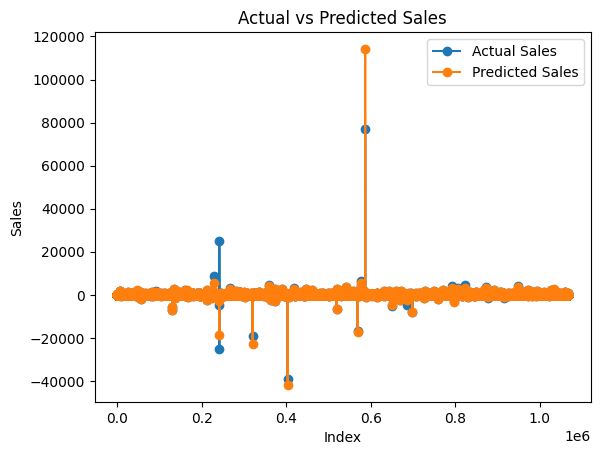

In [29]:
import matplotlib.pyplot as plt

# Sort the test data by date for plotting
sorted_indices = X_test.index.argsort()
sorted_X_test = X_test.iloc[sorted_indices]
sorted_y_test = y_test.iloc[sorted_indices]

# Plot the actual sales
plt.plot(sorted_X_test.index, sorted_y_test, label='Actual Sales', marker='o', linestyle='-')

# Plot the predicted sales
plt.plot(sorted_X_test.index, y_predictions[sorted_indices], label='Predicted Sales', marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()

# Show plot
plt.show()
